# <center>Testing News Asymmetry Between Small and Large Companies</center>


### <center>A sentiment analysis study by Robert Grote and Ryan Fairhurst</center>

This is an interactive Python notebook, which requires that the user run the cells within in order to see the results. Run the cells from the top, all the way down the page by clicking on the first cell, then holding down shift or command or control (depending on whether you're on PC or Mac), then hitting enter.

Install the modules that you will need for reading in all of the data by running the following cell.    
Uncomment the following two lines the first time you run this in order to install the necessary modules by deleting the hash symbol.

In [3]:
!pip install pandas-datareader
!pip install yahoo-finance
!pip install matplotlib

  Using cached pandas_datareader-0.3.0.post0-py2.py3-none-any.whl
  Using cached requests_file-1.4.1-py2.py3-none-any.whl
  Using cached simplejson-3.10.0-cp27-cp27m-win_amd64.whl


Import the following modules:

In [237]:
import yahoo_finance as yfin
import pandas as pd
import pandas_datareader.data as web
import datetime
import csv
import math
import pandas_datareader.data as data
from yahoo_finance import Share
from pandas_datareader.yahoo.quotes import _yahoo_codes
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import time
%matplotlib inline

The basic idea is that, as companies grow in size, the relative proportion of bad news grows with respect to the amount of good news. We are interested in testing whether this is true and appears in the data, whether it differs by industry, whether there is a maximum threshold of how much bad news can be experienced by small companies, and how the proportions change by company size. In the following  prototype, we conceptualize using jumps in Google Trends data and jumps in stock price data to detect newsworthy events, and observations which will amount to the idea of linking sentiment to a company, then recording its size and several other key variables that we think will have interesting relationships with company size and sentiment.

In [2]:
#'Jumps' in data--a place for our ideas
"""
Defining a Jump
When an event happens
Positive/Negative Event
Positive/Negative interest
"""
#trends-->prices
#prices-->trends
#volume-->prices


#Jump Program: Percentage change--not dollar change
#Different times (Stamp when, magnitude, duration, direction)
#--make a program that measures relatively, not absolutely (percentages, not dollars)
#Sustained vs transient growth

#Jumps:
#1: Identify Jumps
#2:Categorize comparable categories
##Compare news profiles (trends)
##Compare

#Var Types:
#C-Continuous
#S-Scalar
#B-Binary (Dummy)
#P-Percentage change
#R-Rate of change
#D-Discreet--qualitative
#Z-Z Score
#T-Time

#Create a new dataset of jump observations
###Categories###
#*0: Company Name/Ticker Symbol
#1:S Size of company (Market cap pre- and post-jump)
#*2:B Direction (+/-, good/bad news)
#*3:S Time: Does this relationship between news and jumps change in different market conditions?
#4:B Period (Does the relationship between news and jumps change in different market conditions (recession, recovery))
###Possibly just use S&P 500 or define broad market categories
#*4:P Magnitude (percent change in price from before jump until after jump)
#5:R Average Rate of change (magnitude/time [measured in days])
#6:D Industry (do different industries behave differently)
#7:B Sustainability-do prices return to pre-jump level (separate test)
#8: Accompanying Google Trends pattern
###Increased interest before/after/during
###sustained interest sustained increased interest?
###Magnitude
###Rate of change
#*9:Z News volatility (maybe find a relationship between this and company size)
#10:Z Stock Price Volatility
#10:T Duration: when do prices stabilize?

#Defining jump: like Robot Broker Program, but with variable x time and variable percentage p
#get rid of redundancy and characterize different types of movement

'\nDefining a Jump\nWhen an event happens\nPositive/Negative Event\nPositive/Negative interest\n'

In [3]:
stockHistory=pd.read_csv('WilshireHist.csv')

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
1,NaN,NaN,NaN,NaN,2.967206,7.933725,3.250350,25.954398,1.384490,NaN,...,NaN,NaN,NaN,5.250,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,2.957786,8.036587,3.265805,25.718507,1.442394,NaN,...,NaN,NaN,NaN,5.210,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.004885,8.036587,3.312162,26.177538,1.437189,NaN,...,NaN,NaN,NaN,5.409,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Dates=stockHistory['Date']
Dates

0       2004-01-01
1       2004-01-02
2       2004-01-05
3       2004-01-06
4       2004-01-07
5       2004-01-08
6       2004-01-09
7       2004-01-12
8       2004-01-13
9       2004-01-14
10      2004-01-15
11      2004-01-16
12      2004-01-19
13      2004-01-20
14      2004-01-21
15      2004-01-22
16      2004-01-23
17      2004-01-26
18      2004-01-27
19      2004-01-28
20      2004-01-29
21      2004-01-30
22      2004-02-02
23      2004-02-03
24      2004-02-04
25      2004-02-05
26      2004-02-06
27      2004-02-09
28      2004-02-10
29      2004-02-11
           ...    
3362    2016-11-21
3363    2016-11-22
3364    2016-11-23
3365    2016-11-24
3366    2016-11-25
3367    2016-11-28
3368    2016-11-29
3369    2016-11-30
3370    2016-12-01
3371    2016-12-02
3372    2016-12-05
3373    2016-12-06
3374    2016-12-07
3375    2016-12-08
3376    2016-12-09
3377    2016-12-12
3378    2016-12-13
3379    2016-12-14
3380    2016-12-15
3381    2016-12-16
3382    2016-12-19
3383    2016

In [6]:
del stockHistory["Date"]

In [7]:
pctjumps=stockHistory.pct_change()

In [8]:
def jumpgetter2(df, lookback=1, ythresh=.2):
    pctchanges=df.pct_change(periods=lookback)
    return pctchanges

In [9]:
pctjumps=jumpgetter2(stockHistory)
pctjumps

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,-0.003175,0.012965,0.004755,-0.009089,0.041823,NaN,...,NaN,NaN,NaN,-0.007619,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.015924,0.000000,0.014195,0.017848,-0.003609,NaN,...,NaN,NaN,NaN,0.038196,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,-0.047022,-0.013333,-0.005183,0.031417,0.022635,NaN,...,NaN,NaN,NaN,0.053799,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.013158,0.035135,0.001042,-0.026446,0.034085,NaN,...,NaN,NaN,NaN,-0.052632,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,-0.006494,0.002611,0.021863,-0.001213,-0.015410,NaN,...,NaN,NaN,NaN,-0.035185,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,0.016340,0.020834,-0.006623,0.011899,0.031739,NaN,...,NaN,NaN,NaN,0.047985,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,-0.003216,0.007653,0.000000,0.005519,0.016434,NaN,...,NaN,NaN,NaN,-0.010989,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,0.000000,0.012658,0.046668,0.004773,0.003317,NaN,...,NaN,NaN,NaN,-0.027778,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pctjumps['Date']=Dates
pctjumps

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-02
2,NaN,NaN,NaN,NaN,-0.003175,0.012965,0.004755,-0.009089,0.041823,NaN,...,NaN,NaN,-0.007619,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-05
3,NaN,NaN,NaN,NaN,0.015924,0.000000,0.014195,0.017848,-0.003609,NaN,...,NaN,NaN,0.038196,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-06
4,NaN,NaN,NaN,NaN,-0.047022,-0.013333,-0.005183,0.031417,0.022635,NaN,...,NaN,NaN,0.053799,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-07
5,NaN,NaN,NaN,NaN,0.013158,0.035135,0.001042,-0.026446,0.034085,NaN,...,NaN,NaN,-0.052632,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-08
6,NaN,NaN,NaN,NaN,-0.006494,0.002611,0.021863,-0.001213,-0.015410,NaN,...,NaN,NaN,-0.035185,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-09
7,NaN,NaN,NaN,NaN,0.016340,0.020834,-0.006623,0.011899,0.031739,NaN,...,NaN,NaN,0.047985,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-12
8,NaN,NaN,NaN,NaN,-0.003216,0.007653,0.000000,0.005519,0.016434,NaN,...,NaN,NaN,-0.010989,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-13
9,NaN,NaN,NaN,NaN,0.000000,0.012658,0.046668,0.004773,0.003317,NaN,...,NaN,NaN,-0.027778,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-14


In [11]:
Dates

0       2004-01-01
1       2004-01-02
2       2004-01-05
3       2004-01-06
4       2004-01-07
5       2004-01-08
6       2004-01-09
7       2004-01-12
8       2004-01-13
9       2004-01-14
10      2004-01-15
11      2004-01-16
12      2004-01-19
13      2004-01-20
14      2004-01-21
15      2004-01-22
16      2004-01-23
17      2004-01-26
18      2004-01-27
19      2004-01-28
20      2004-01-29
21      2004-01-30
22      2004-02-02
23      2004-02-03
24      2004-02-04
25      2004-02-05
26      2004-02-06
27      2004-02-09
28      2004-02-10
29      2004-02-11
           ...    
3362    2016-11-21
3363    2016-11-22
3364    2016-11-23
3365    2016-11-24
3366    2016-11-25
3367    2016-11-28
3368    2016-11-29
3369    2016-11-30
3370    2016-12-01
3371    2016-12-02
3372    2016-12-05
3373    2016-12-06
3374    2016-12-07
3375    2016-12-08
3376    2016-12-09
3377    2016-12-12
3378    2016-12-13
3379    2016-12-14
3380    2016-12-15
3381    2016-12-16
3382    2016-12-19
3383    2016

In [12]:
stockHistory

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2.967206,7.933725,3.250350,25.954398,1.384490,NaN,...,NaN,NaN,NaN,5.250,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,2.957786,8.036587,3.265805,25.718507,1.442394,NaN,...,NaN,NaN,NaN,5.210,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.004885,8.036587,3.312162,26.177538,1.437189,NaN,...,NaN,NaN,NaN,5.409,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,2.863589,7.929433,3.294995,26.999970,1.469720,NaN,...,NaN,NaN,NaN,5.700,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,2.901268,8.208036,3.298428,26.285920,1.519816,NaN,...,NaN,NaN,NaN,5.400,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,2.882428,8.229465,3.370541,26.254043,1.496395,NaN,...,NaN,NaN,NaN,5.210,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,2.929527,8.400914,3.348219,26.566441,1.543889,NaN,...,NaN,NaN,NaN,5.460,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,2.920107,8.465209,3.348219,26.713074,1.569262,NaN,...,NaN,NaN,NaN,5.400,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,2.920107,8.572364,3.504475,26.840585,1.574467,NaN,...,NaN,NaN,NaN,5.250,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
saved2=pd.DataFrame()

In [131]:
saved2['caps']=caps['caps']

In [132]:
saved2

,caps
0,6.62B
1,NaN
2,NaN
3,NaN
4,79.62M
5,1.92B
6,1.81B
7,11.90B
8,712.06B
9,NaN


In [135]:
saved3=saved2.T

In [137]:
saved3.columns=stockHistory.columns

In [138]:
saved3

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
caps,6.62B,NaN,NaN,NaN,79.62M,1.92B,1.81B,11.90B,712.06B,NaN,...,53.43M,NaN,NaN,NaN,30080,NaN,NaN,NaN,504.16M,NaN


In [134]:
caps['caps']

0         6.62B
1           NaN
2           NaN
3           NaN
4        79.62M
5         1.92B
6         1.81B
7        11.90B
8       712.06B
9           NaN
10        1.34B
11        2.34B
12          NaN
13        1.12B
14          NaN
15       19.72B
16        1.70B
17        1.85B
18          NaN
19          NaN
20          NaN
21          NaN
22        1.50B
23          NaN
24          NaN
25       23.16M
26          NaN
27          NaN
28        2.24B
29        3.84M
         ...   
4080    447.51M
4081    427.66M
4082        NaN
4083     24.28B
4084        NaN
4085        NaN
4086      4.54B
4087        NaN
4088    276.16M
4089        NaN
4090        NaN
4091        NaN
4092        NaN
4093        NaN
4094      9.07B
4095    895.20M
4096        NaN
4097    269.88M
4098        NaN
4099        NaN
4100     53.43M
4101        NaN
4102        NaN
4103        NaN
4104      30080
4105        NaN
4106        NaN
4107        NaN
4108    504.16M
4109        NaN
Name: caps, dtype: objec

In [143]:
description=stockHistory.pct_change().describe().append(saved3)

In [153]:
description['AA'][8]

'6.62B'

In [244]:
description2=pd.DataFrame()

TypeError: 'list' object is not callable

In [245]:
description3=description2.append([listed,maxjumps, real_caps])

In [246]:
description3.columns=description3.values[0]

In [247]:
description4=description3.T

In [256]:
del description4['ticker']

In [258]:
description4.columns=['maxjump','cap']

In [260]:
description4.describe()

TypeError: isinstance() arg 2 must be a class, type, or tuple of classes and types

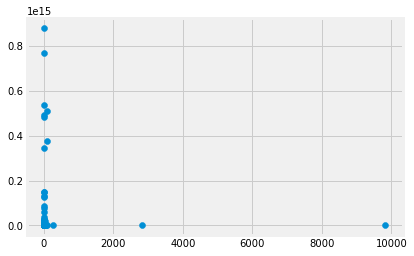

In [250]:
plt.scatter(description4.maxjump, description4.cap)

In [261]:
description4.to_csv('description.csv')

In [262]:
description4

,maxjump,cap
AA,0.0878788,6.62e+09
AAME,0.459015,7.962e+07
AAN,0.215384,1.92e+09
AAON,0.177245,1.81e+09
AAP,0.165576,1.19e+10
AAPL,0.13905,7.1206e+11
AAWW,0.270615,1.34e+09
AB,0.238019,2.34e+09
ABAX,0.233625,1.12e+09
ABC,0.102207,1.972e+10


In [180]:
description.values[8][9]

nan

In [226]:
real_caps

[6620000000.0,
 79620000.0,
 1920000000.0,
 1810000000.0,
 11900000000.0,
 712060000000.0,
 1340000000.0,
 2340000000.0,
 1120000000.0,
 19720000000.0,
 1700000000.0,
 1850000000.0,
 1500000000.0,
 23160000.0,
 2240000000.0,
 3840000.0,
 5060000000.0,
 376260000.0,
 65800000000.0,
 143160000.0,
 4760000000.0,
 242280000.0,
 6550000000.0,
 472920000.0,
 117780000.0,
 10560000.0,
 11390000000.0,
 583620000.0,
 2330000000.0,
 466370000.0,
 5860000000.0,
 1150000000.0,
 297730000.0,
 69921000000.0,
 83220000.0,
 10180000.0,
 2280000000.0,
 16210000.0,
 14550000.0,
 59130000000.0,
 1150000000.0,
 255650000.0,
 25500000000.0,
 28290000.0,
 2157000000.0,
 26050000000.0,
 75540000.0,
 44750000000.0,
 123130000.0,
 13540000000.0,
 19230000000.0,
 1050000000.0,
 390990000.0,
 173740000.0,
 12950000000.0,
 68400000.0,
 2440000000.0,
 2400000000.0,
 2780000000.0,
 31520000000.0,
 5260000.0,
 94070000.0,
 8960000.0,
 7550000000.0,
 44060000000.0,
 15420000.0,
 18330000.0,
 1900000000.0,
 489730000.

In [240]:
np.nan

nan

In [241]:
j=1
order=0
real_caps=[]
listed=[]
maxjumps=[]
for i in range(len(description.columns)):
    if type(description.iloc[8][i])==str:
        if description.iloc[7][i]!=np.nan:
            if description.iloc[8][i][-1]=='B':
                order=1000000000
            elif description.iloc[8][i][-1]=='M':
                order=1000000
        real_caps.append(float(description.iloc[8][i][:-1])*order)
        listed.append(description.columns[i])
        maxjumps.append(description.iloc[7][i])
        

In [242]:
maxjumps

[0.08787875,
 0.4590151095888979,
 0.21538387548668858,
 0.17724495803227636,
 0.16557580739716804,
 0.1390496531445795,
 0.27061476761619185,
 0.23801917415471152,
 0.2336254796373325,
 0.10220703253707675,
 0.311110318864809,
 0.20997381160688255,
 0.3191489361702129,
 2.1018868285266334,
 0.23748939727119578,
 1.0,
 0.29277757461098686,
 0.36597929312981514,
 0.10383421956249728,
 0.5,
 1.3608695652173912,
 0.24809164233553527,
 0.1553281108162261,
 0.23100320403564756,
 0.49572649572649574,
 0.4554449350777259,
 0.12502218788476194,
 0.8329411764705883,
 0.3004486883911084,
 1.0588235294117645,
 0.17772215269086367,
 2.8288288288288284,
 0.24553581797256063,
 nan,
 0.17540987730210844,
 0.7132867132867131,
 0.19733924611973408,
 0.4616788321167882,
 1.4166661265427098,
 0.14358108108108092,
 0.28998979928513036,
 0.6375,
 0.15646252317773368,
 0.7326704684971508,
 nan,
 0.17337807492844926,
 13.999998039098417,
 0.11827265229446637,
 0.20642202545029908,
 0.2461880581240583,
 0.147

In [191]:
description

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
count,51,2373,1279,0,3272,3272,3272,3272,3272,0,...,2517,0,0,2580,0,0,0,0,2934,1762
mean,0.00485213,0.00017769,inf,NaN,0.00116226,0.000691631,0.00104292,0.000768246,0.00158959,NaN,...,7.52584e-05,NaN,NaN,0.00140023,NaN,NaN,NaN,NaN,0.000852754,-0.000154455
std,0.0295513,0.0337385,NaN,NaN,0.0466869,0.023083,0.025899,0.0198134,0.0217382,NaN,...,0.0443735,NaN,NaN,0.0439745,NaN,NaN,NaN,NaN,0.0361203,0.0465212
min,-0.0666666,-0.276331,-1,NaN,-0.375,-0.26468,-0.18323,-0.169671,-0.179195,NaN,...,-0.325308,NaN,NaN,-0.253294,NaN,NaN,NaN,NaN,-0.324561,-0.301493
25%,-0.0098952,-0.0149477,0,NaN,-0.0114782,-0.00954405,-0.0122742,-0.00826373,-0.00902488,NaN,...,-0.0165877,NaN,NaN,-0.018788,NaN,NaN,NaN,NaN,-0.0163869,-0.0159816
50%,0.00186923,0,0,NaN,0,0,0.000389841,0.000323744,0.00112991,NaN,...,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0005752,0
75%,0.0132499,0.0153153,0,NaN,0.0103448,0.0106861,0.0138851,0.00922727,0.0125404,NaN,...,0.0151515,NaN,NaN,0.01965,NaN,NaN,NaN,NaN,0.0178731,0.0136986
max,0.0878788,0.239709,inf,NaN,0.459015,0.215384,0.177245,0.165576,0.13905,NaN,...,0.811989,NaN,NaN,0.43281,NaN,NaN,NaN,NaN,0.240479,0.812081
caps,6.62B,NaN,NaN,NaN,79.62M,1.92B,1.81B,11.90B,712.06B,NaN,...,53.43M,NaN,NaN,NaN,30080,NaN,NaN,NaN,504.16M,NaN


In [18]:
def jumpgetter(df, lookback=1, ythresh=.2): #make ythresh a ratio like .1 for a ten percent jump
    pctchanges=df.pct_change(periods=lookback)
    tfdf=pctchanges>ythresh
    return tfdf #pctchanges.max()

In [19]:
'''
Not this:
    tfdf=pd.DataFrame()
    for col in range(len(pctchanges.columns)):
        if ythresh>0:
            jumpyorn=df[pctchanges.columns[col]]>ythresh
            jumpyorn.rename(df.columns[col])
        if ythresh<0:
            jumpyorn=df[pctchanges.columns[col]]<ythresh
            jumpyorn.rename(df.columns[col])
        tfdf[df.columns[col]]=jumpyorn
    jumpsofthresh=pd.DataFrame(tfdf.values*pctchanges.values)
'''

'\nNot this:\n    tfdf=pd.DataFrame()\n    for col in range(len(pctchanges.columns)):\n        if ythresh>0:\n            jumpyorn=df[pctchanges.columns[col]]>ythresh\n            jumpyorn.rename(df.columns[col])\n        if ythresh<0:\n            jumpyorn=df[pctchanges.columns[col]]<ythresh\n            jumpyorn.rename(df.columns[col])\n        tfdf[df.columns[col]]=jumpyorn\n    jumpsofthresh=pd.DataFrame(tfdf.values*pctchanges.values)\n'

In [20]:
truefalse=jumpgetter(stockHistory)
truefalse['Dates']=Dates

In [21]:
truefalse

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ,Dates
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-01
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-02
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-05
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-06
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-07
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-08
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-09
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-12
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-13
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-14


In [22]:
type(truefalse)
indexedtf=truefalse.set_index('Dates')

In [23]:
pctjumpsdated=pctjumps.set_index(Dates)

In [24]:
pctjumpsdated

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ,Date
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-02
2004-01-05,NaN,NaN,NaN,NaN,-0.003175,0.012965,0.004755,-0.009089,0.041823,NaN,...,NaN,NaN,-0.007619,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-05
2004-01-06,NaN,NaN,NaN,NaN,0.015924,0.000000,0.014195,0.017848,-0.003609,NaN,...,NaN,NaN,0.038196,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-06
2004-01-07,NaN,NaN,NaN,NaN,-0.047022,-0.013333,-0.005183,0.031417,0.022635,NaN,...,NaN,NaN,0.053799,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-07
2004-01-08,NaN,NaN,NaN,NaN,0.013158,0.035135,0.001042,-0.026446,0.034085,NaN,...,NaN,NaN,-0.052632,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-08
2004-01-09,NaN,NaN,NaN,NaN,-0.006494,0.002611,0.021863,-0.001213,-0.015410,NaN,...,NaN,NaN,-0.035185,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-09
2004-01-12,NaN,NaN,NaN,NaN,0.016340,0.020834,-0.006623,0.011899,0.031739,NaN,...,NaN,NaN,0.047985,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-12
2004-01-13,NaN,NaN,NaN,NaN,-0.003216,0.007653,0.000000,0.005519,0.016434,NaN,...,NaN,NaN,-0.010989,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-13


In [25]:
del pctjumpsdated['Date']

In [26]:
pctjumpsdated

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,NaN,NaN,NaN,NaN,-0.003175,0.012965,0.004755,-0.009089,0.041823,NaN,...,NaN,NaN,NaN,-0.007619,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-06,NaN,NaN,NaN,NaN,0.015924,0.000000,0.014195,0.017848,-0.003609,NaN,...,NaN,NaN,NaN,0.038196,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-07,NaN,NaN,NaN,NaN,-0.047022,-0.013333,-0.005183,0.031417,0.022635,NaN,...,NaN,NaN,NaN,0.053799,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-08,NaN,NaN,NaN,NaN,0.013158,0.035135,0.001042,-0.026446,0.034085,NaN,...,NaN,NaN,NaN,-0.052632,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-09,NaN,NaN,NaN,NaN,-0.006494,0.002611,0.021863,-0.001213,-0.015410,NaN,...,NaN,NaN,NaN,-0.035185,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-12,NaN,NaN,NaN,NaN,0.016340,0.020834,-0.006623,0.011899,0.031739,NaN,...,NaN,NaN,NaN,0.047985,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-13,NaN,NaN,NaN,NaN,-0.003216,0.007653,0.000000,0.005519,0.016434,NaN,...,NaN,NaN,NaN,-0.010989,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
indexedtf

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
Dates,,,,,,,,,,,,,,,,,,,,,
2004-01-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-06,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-08,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
type(indexedtf.ix)

pandas.core.indexing._IXIndexer

In [81]:
result = pd.melt(indexedtf.reset_index(), id_vars=['Dates'])
mask = result['value'] == True
result = result.loc[mask, ['Dates', 'variable']]
result.columns = ['date', 'ticker']
#print result
#print result[1]
#result[''] = df.index
print result.ticker
#print result[1]

result['%change']=pctjumpsdated.lookup(result.date, result.ticker)



#result["%change"] = pctjumps.lookup(result.index, result[1])
#result
#create a third column for the percent jump. iloc? from pctJumps DF. sort on this column

4747        AACC
8702         AAI
9532         AAI
9792         AAI
9793         AAI
10056        AAI
10057        AAI
13615       AAME
14689       AAME
14821       AAME
14840       AAME
14844       AAME
14850       AAME
14851       AAME
14854       AAME
14861       AAME
14871       AAME
14879       AAME
14894       AAME
14898       AAME
14928       AAME
14931       AAME
14940       AAME
14964       AAME
14971       AAME
14996       AAME
15023       AAME
15028       AAME
15031       AAME
15077       AAME
            ... 
13903060     ZLC
13907986      ZN
13908032      ZN
13908112      ZN
13908542      ZN
13908611      ZN
13908631      ZN
13908743      ZN
13909217      ZN
13909577      ZN
13909795      ZN
13909815      ZN
13910270      ZN
13917510    ZOLT
13917627    ZOLT
13917831    ZOLT
13918623    ZOLT
13918653    ZOLT
13918655    ZOLT
13919227    ZOLT
13919440    ZOLT
13919487    ZOLT
13935582    ZUMZ
13936402    ZUMZ
13938998      ZZ
13939005      ZZ
13939081      ZZ
13939090      

In [82]:
tohist=result.ticker.value_counts()
tohist.hist()

In [83]:
aj=pd.Series(data=[1,2,3,4,5,6,7], index=[9,8,7,6,5,4,3])

In [84]:
tohist

ATC     455
TNB     406
ABK     394
TBL     288
SBX     240
AMAR    238
PDMI    236
PVSP    236
BKR     232
AVXT    227
PRST    225
ALSE    222
CXM     220
ESCC    208
ASI     205
BLFS    205
ARWD    198
ARM     194
IMM     192
CHP     191
FRE     186
PTIX    185
POSC    179
IN      178
EAR     174
ANDR    174
TGLO    172
CFL     172
CBMC    171
WNEA    171
       ... 
HURN      1
EGAS      1
GLT       1
BSX       1
UNB       1
ESIO      1
JEC       1
DLR       1
ALL       1
ALX       1
DLB       1
AFL       1
ACIW      1
SSD       1
BTN       1
ALOT      1
UNAM      1
JBT       1
MA        1
MG        1
PEBK      1
KFRC      1
LUB       1
TK        1
JCS       1
LUK       1
TNC       1
FEIC      1
CMP       1
LSCC      1
Name: ticker, dtype: int64

In [80]:
type(tohist)

pandas.core.series.Series

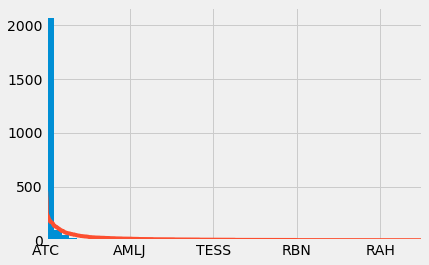

In [33]:
#plt.hist(aj)
tohist.plot()
plt.legend().remove()
plt.show()

In [44]:
result

,date,ticker,%change
4747,2009-03-12,AACC,0.239709
8702,2011-05-10,AAI,inf
9532,2014-07-15,AAI,2.000000
9792,2015-07-14,AAI,1.333333
9793,2015-07-15,AAI,0.857143
10056,2016-07-18,AAI,1.000000
10057,2016-07-19,AAI,0.923077
13615,2004-03-08,AAME,0.208054
14689,2008-04-18,AAME,0.203488
14821,2008-10-21,AAME,0.247312


In [45]:
sort=result.sort_values(by='%change',ascending=False) #sort on % change

In [46]:
sortondate=result.sort_values(by='date',ascending=False)

In [47]:
sortondate.to_csv('datesortover20.csv')

In [48]:
sort

,date,ticker,%change
5192004,2012-08-08,GAP,inf
2124716,2009-01-28,CAFI,inf
8702,2011-05-10,AAI,inf
10967638,2008-12-29,SBX,inf
11076238,2009-03-17,SEH,inf
5192047,2012-10-08,GAP,inf
6395051,2008-05-02,IIG,2.622727e+07
6395083,2008-06-17,IIG,5.468749e+06
3883389,2015-04-10,DRL,3.932243e+06
2550242,2014-12-04,CHP,3.225557e+06


In [49]:
sort.describe()

,%change
count,3.607000e+04
mean,inf
std,NaN
min,2.000000e-01
25%,2.500000e-01
50%,3.333333e-01
75%,8.000000e-01
max,inf


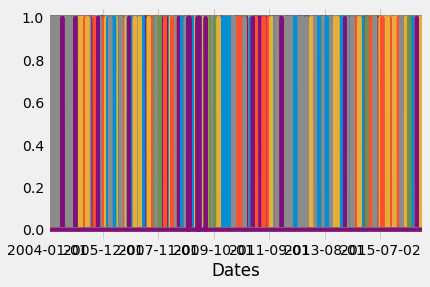

In [50]:
indexedtf.plot()
plt.legend().remove()
plt.show()

In [60]:
type((result.iloc[0][0]).dt.date)

AttributeError: 'str' object has no attribute 'dt'

In [61]:
result.iloc[0][1]

'AACC'

In [62]:
#Use index and column string to get 
print result.ix[1]

KeyError: 1L

In [63]:
#print result.ix[1,1]
#print pctjumps.loc[10][100]
#jumps=[]
#for i in range(len(result.values)):
    #print i
    #jumps.append(pctjumps.loc[i][result.loc[i][1]])
#jumps

In [64]:
jumpFilter=pd.DataFrame()
#jumpFilter['ticker']=[]
#jumpFilter['percentjumpy']=[]
#jumpFilter['posneg']=[]
#jumpFilter['startdate']=[]
jumpFilter

""


In [65]:
pctchanges['Date']=stockHistory['Date']

KeyError: 'Date'

In [66]:
pctchanges

NameError: name 'pctchanges' is not defined

In [67]:
pctchanges=stockHistory.pct_change()

In [68]:
pctchanges.to_csv('percentchanges.csv')

In [69]:
pctchanges.max()

AA         0.087879
AACC       0.239709
AAI             inf
AAII            NaN
AAME       0.459015
AAN        0.215384
AAON       0.177245
AAP        0.165576
AAPL       0.139050
AATI            NaN
AAWW       0.270615
AB         0.238019
ABAT            NaN
ABAX       0.233625
ABBC            NaN
ABC        0.102207
ABCB       0.311110
ABCO       0.209974
ABCW       0.062910
ABD             NaN
ABDS            NaN
ABFS            NaN
ABG        0.319149
ABH.Z           NaN
ABII            NaN
ABIO       2.101887
ABK      578.146041
ABL       67.727522
ABM        0.237489
ABMC       1.000000
            ...    
YORW       0.119885
YRCW       0.909091
YSI             NaN
YUM        0.114710
ZANE       5.816720
ZBB             NaN
ZBRA       0.143109
ZEP             NaN
ZEUS       0.252140
ZGEN            NaN
ZHNE       0.633929
ZIGO       0.452575
ZILG            NaN
ZINC            NaN
ZION       0.275568
ZIOP       0.633028
ZIPR       1.218102
ZIXI       0.319672
ZLC        0.480427


In [ ]:
pctchanges.plot()
plt.legend().remove()
plt.show()

In [52]:
del stockHistory['Date']

KeyError: 'Date'

In [53]:
print stockHistory.iloc[0,0]

nan


In [54]:
type(stockHistory.values[1][0])

numpy.float64

In [55]:
stockHistory.values[1:5]

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [56]:
stockHistory[1:].pct_change()

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,-0.003175,0.012965,0.004755,-0.009089,0.041823,NaN,...,NaN,NaN,NaN,-0.007619,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.015924,0.000000,0.014195,0.017848,-0.003609,NaN,...,NaN,NaN,NaN,0.038196,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,-0.047022,-0.013333,-0.005183,0.031417,0.022635,NaN,...,NaN,NaN,NaN,0.053799,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.013158,0.035135,0.001042,-0.026446,0.034085,NaN,...,NaN,NaN,NaN,-0.052632,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,-0.006494,0.002611,0.021863,-0.001213,-0.015410,NaN,...,NaN,NaN,NaN,-0.035185,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,0.016340,0.020834,-0.006623,0.011899,0.031739,NaN,...,NaN,NaN,NaN,0.047985,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,-0.003216,0.007653,0.000000,0.005519,0.016434,NaN,...,NaN,NaN,NaN,-0.010989,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,0.000000,0.012658,0.046668,0.004773,0.003317,NaN,...,NaN,NaN,NaN,-0.027778,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,0.000000,0.000000,0.055854,-0.007839,-0.055785,NaN,...,NaN,NaN,NaN,0.005714,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def jumpFilter(df, y=.1,x=1):
    lastPrice=1000 #something really high so that we do not have to call the first thing a jump
    listOfJumps=[] #ticker, date, jump threshold passed, lookahead period, pos/neg, percentJump, avgdailyrateofchange, counter
    y=.5 #threshold
    x=1 #lookahead period
    for i in range(1,len(df.columns)): #go over the columns. skip the first one because it is a set of dates; change 3 to len(df.columns) for implementation
        counter=0
        for j in range(len(df.values[:])): #go down and check for each row; get rid of the [1:10] to be comprehensive
            if (j+x)<len(df.values): #execute the following code until the final date minus the lookahead
                if type(df.values[j][i])!=str:
                    if math.isnan(float(df.values[j][i]))==False:
                        if df.values[j][i]!=0:
                            currentPrice=df.values[j][i]
                            futurePrice=df.values[j+x][i]
                            if futurePrice>currentPrice:
                                posneg=1
                            elif futurePrice<currentPrice:
                                posneg=0
                            percentJump=abs((currentPrice-futurePrice)/currentPrice)
                            if (currentPrice-futurePrice)/currentPrice>=y:
                                counter+=1
                                avgDailyRateChange=percentJump/(x+counter-1)
                            elif (currentPrice-futurePrice)/currentPrice<y and counter>=1:
                                listOfJumps.append([df.columns[i],df.values[j][0], y, x, posneg, percentJump, avgDailyRateChange, counter])
                                counter=0
    return listOfJumps

In [57]:
jumpFilter(stockHistory) #columns=['ticker','date','ythresh','lookahead','pos1/neg0','percentjump','avgdailyrateofchange','counter']

NameError: name 'jumpFilter' is not defined

In [58]:
ourdata=pd.DataFrame(jumpFilter(stockHistory), columns=['ticker','date','ythresh','lookahead','pos1/neg0','percentjump','avgdailyrateofchange','counter'])

NameError: name 'jumpFilter' is not defined

In [59]:
ourdata

NameError: name 'ourdata' is not defined

In [ ]:
bonk=float('NaN')
bonk
math.isnan(bonk)
type(bonk)

In [53]:
#jumplist=[]
#for rowIndex in range(len(stockHistory.values)): #delete the 3 for enlarged application
#    for ticker in range(len(stockHistory.columns[1:3])):
#        myfavthings.append(stockHistory.iloc[ticker,rowIndex])
#jumplist

In [54]:
#jumpFilter['stuff']=jumplist

In [55]:
#stockHistory.values

In [56]:
#list(stockHistory)

## Companies we had in mind:

Dryships
<img src='DRYS.png'>
(Source: Yahoo Finance)

Semi-LED Corp
<img src='DRYS.png'>
(Source: Yahoo Finance)

Chipotle
<img src='CMG.png'>
(Source: Yahoo Finance)

In [70]:
#read in the csv with the russell 3000 stock data and Wilshire 5000 stock data (Just a dataframe of symbols for now)
#Commented out since the repository now contains this csv

dfRussell=pd.read_csv('russell_3000_2011-06-27.csv')
dfWilshire=pd.read_csv('wilshire5000.csv')

In [71]:
#Taking the values from the dataframes and making them into arrays
#Commented out since the repository now contains this csv

arrayRussell=dfRussell.values.flatten()
arrayWilshire=dfWilshire.values.flatten()

In [72]:
yahooey=('YHOO','ten')
yahooey=np.asarray(yahooey)
type(yahooey)

numpy.ndarray

In [268]:
print arrayWilshire
print type(arrayWilshire)
print type(yahooey)

['AA' 'AACC' 'AAI' ..., 'ZTHO' 'ZUMZ' 'ZZ']
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [61]:
#Make the dataframe with the adjusted close prices for all of the Wilshire 5000 Companies
#Commented out since the repository now contains this csv

ls_key = 'Adj Close'
start = datetime.datetime(2004,1,1)
end = datetime.datetime(2016,12,31)
f = data.DataReader(arrayWilshire[:], 'yahoo',start,end)

cleanData = f.ix[ls_key]
dataFrame = pd.DataFrame(cleanData)

print dataFrame[:]

C:\ProgramData\Anaconda2\lib\site-packages\pandas_datareader\base.py:174: SymbolWarning: Failed to read symbol: 'AAII', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\ProgramData\Anaconda2\lib\site-packages\pandas_datareader\base.py:174: SymbolWarning: Failed to read symbol: 'AATI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\ProgramData\Anaconda2\lib\site-packages\pandas_datareader\base.py:174: SymbolWarning: Failed to read symbol: 'ABAT', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\ProgramData\Anaconda2\lib\site-packages\pandas_datareader\base.py:174: SymbolWarning: Failed to read symbol: 'ABBC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\ProgramData\Anaconda2\lib\site-packages\pandas_datareader\base.py:174: SymbolWarning: Failed to read symbol: 'ABD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\ProgramData\Anaconda2\lib\site-packages\pandas_datareader\

KeyboardInterrupt: 

In [74]:
mylist=[]
for x in range(len(arrayWilshire)):
    mylist.append(Share(arrayWilshire[x]).get_market_cap())

KeyboardInterrupt: 

In [75]:
saved=mylist
saved

['6.31B',
 None,
 None,
 None,
 '77.58M',
 '1.94B',
 '1.79B',
 '11.59B',
 '717.67B',
 None,
 '1.41B',
 '2.29B',
 None,
 '1.12B',
 None,
 '20.03B',
 '1.70B',
 '1.82B',
 None,
 None,
 None,
 None,
 '1.48B',
 None,
 None,
 '23.61M',
 None,
 None,
 '2.28B',
 '3.13M',
 '5.09B',
 '378.31M',
 '78.93B',
 '139.22M',
 None,
 '4.71B',
 None,
 '241.63M']

In [76]:
print saved[0]

6.31B


In [77]:
caps=[]
for i in range(len(saved)):
    if type(saved[i])!=str:
        caps.append[None]
    if type(saved[i])==str:
        if saved[i][-1]=='B':
            caps.append(1000000000*float(saved[i][:-1]))
        elif saved[i][-1]=='M':
            caps.append(1000000*float(saved[i][:-1]))
            

TypeError: 'builtin_function_or_method' object has no attribute '__getitem__'

In [67]:
print None

None


In [106]:
df=pd.DataFrame()

In [107]:
df['tickers']=stockHistory.columns

ValueError: Length of values does not match length of index

In [71]:
df.to_csv('caps')

In [109]:
caps=pd.read_csv('caps.csv')

In [37]:
sort.to_csv('sort.csv')

NameError: name 'sort' is not defined

In [38]:
import datetime

In [110]:
caps.set_index('tickers')

,Unnamed: 0,caps
tickers,,
AA,0,6.62B
AACC,1,NaN
AAI,2,NaN
AAII,3,NaN
AAME,4,79.62M
AAN,5,1.92B
AAON,6,1.81B
AAP,7,11.90B
AAPL,8,712.06B


In [127]:
caps['caps']

0         6.62B
1           NaN
2           NaN
3           NaN
4        79.62M
5         1.92B
6         1.81B
7        11.90B
8       712.06B
9           NaN
10        1.34B
11        2.34B
12          NaN
13        1.12B
14          NaN
15       19.72B
16        1.70B
17        1.85B
18          NaN
19          NaN
20          NaN
21          NaN
22        1.50B
23          NaN
24          NaN
25       23.16M
26          NaN
27          NaN
28        2.24B
29        3.84M
         ...   
4080    447.51M
4081    427.66M
4082        NaN
4083     24.28B
4084        NaN
4085        NaN
4086      4.54B
4087        NaN
4088    276.16M
4089        NaN
4090        NaN
4091        NaN
4092        NaN
4093        NaN
4094      9.07B
4095    895.20M
4096        NaN
4097    269.88M
4098        NaN
4099        NaN
4100     53.43M
4101        NaN
4102        NaN
4103        NaN
4104      30080
4105        NaN
4106        NaN
4107        NaN
4108    504.16M
4109        NaN
Name: caps, dtype: objec

In [111]:
type(datetime.date(sort.values[0][0]))

TypeError: an integer is required

In [112]:
sort.values[0][0][:-3]

'2012-08'

In [113]:
sort['caps']=caps['caps'][sort['ticker']]

ValueError: cannot reindex from a duplicate axis

In [114]:
sort

,date,ticker,%change
5192004,2012-08-08,GAP,inf
2124716,2009-01-28,CAFI,inf
8702,2011-05-10,AAI,inf
10967638,2008-12-29,SBX,inf
11076238,2009-03-17,SEH,inf
5192047,2012-10-08,GAP,inf
6395051,2008-05-02,IIG,2.622727e+07
6395083,2008-06-17,IIG,5.468749e+06
3883389,2015-04-10,DRL,3.932243e+06
2550242,2014-12-04,CHP,3.225557e+06


In [115]:
trendy=pd.DataFrame(data=[51], columns=['GAP'], index=['2012-08'])
trendy

,GAP
2012-08,51


In [116]:
trendy['GAP']['2012-08']

51

In [117]:
redone=sort.reindex()

In [118]:
redone=sort.reset_index()

In [119]:
redone

,index,date,ticker,%change
0,5192004,2012-08-08,GAP,inf
1,2124716,2009-01-28,CAFI,inf
2,8702,2011-05-10,AAI,inf
3,10967638,2008-12-29,SBX,inf
4,11076238,2009-03-17,SEH,inf
5,5192047,2012-10-08,GAP,inf
6,6395051,2008-05-02,IIG,2.622727e+07
7,6395083,2008-06-17,IIG,5.468749e+06
8,3883389,2015-04-10,DRL,3.932243e+06
9,2550242,2014-12-04,CHP,3.225557e+06


In [120]:
redone['popular']=0

In [121]:
redone['popular'][0]

0

In [122]:
trendy['GAP']['2012-08']

51

In [123]:
redone

,index,date,ticker,%change,popular
0,5192004,2012-08-08,GAP,inf,0
1,2124716,2009-01-28,CAFI,inf,0
2,8702,2011-05-10,AAI,inf,0
3,10967638,2008-12-29,SBX,inf,0
4,11076238,2009-03-17,SEH,inf,0
5,5192047,2012-10-08,GAP,inf,0
6,6395051,2008-05-02,IIG,2.622727e+07,0
7,6395083,2008-06-17,IIG,5.468749e+06,0
8,3883389,2015-04-10,DRL,3.932243e+06,0
9,2550242,2014-12-04,CHP,3.225557e+06,0


In [124]:
redone["popular"]=1

In [125]:
trendy

,GAP
2012-08,51


In [126]:
redone

,index,date,ticker,%change,popular
0,5192004,2012-08-08,GAP,inf,1
1,2124716,2009-01-28,CAFI,inf,1
2,8702,2011-05-10,AAI,inf,1
3,10967638,2008-12-29,SBX,inf,1
4,11076238,2009-03-17,SEH,inf,1
5,5192047,2012-10-08,GAP,inf,1
6,6395051,2008-05-02,IIG,2.622727e+07,1
7,6395083,2008-06-17,IIG,5.468749e+06,1
8,3883389,2015-04-10,DRL,3.932243e+06,1
9,2550242,2014-12-04,CHP,3.225557e+06,1


In [145]:
trendy[redone['ticker'][0]][redone['date'][0][:-3]]

51

In [92]:
redone["popular"][0]=51

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [155]:
redone["popular"][0]=trendy[redone['ticker'][0]][redone['month'][0]] ############WORKS! Just take out the 0s and make the right csv and we're in business!

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [149]:
redone

,index,date,ticker,%change,popular,month,index2
0,5192004,2012-08-08,GAP,inf,51,2012-08,0
1,2124716,2009-01-28,CAFI,inf,51,2009-01,1
2,8702,2011-05-10,AAI,inf,51,2011-05,2
3,10967638,2008-12-29,SBX,inf,51,2008-12,3
4,11076238,2009-03-17,SEH,inf,51,2009-03,4
5,5192047,2012-10-08,GAP,inf,51,2012-10,5
6,6395051,2008-05-02,IIG,2.622727e+07,51,2008-05,6
7,6395083,2008-06-17,IIG,5.468749e+06,51,2008-06,7
8,3883389,2015-04-10,DRL,3.932243e+06,51,2015-04,8
9,2550242,2014-12-04,CHP,3.225557e+06,51,2014-12,9


In [94]:
redated=redone['date'][:][:-3]

In [95]:
redated

0        2012-08-08
1        2009-01-28
2        2011-05-10
3        2008-12-29
4        2009-03-17
5        2012-10-08
6        2008-05-02
7        2008-06-17
8        2015-04-10
9        2014-12-04
10       2016-04-26
11       2014-12-04
12       2014-12-09
13       2014-12-18
14       2014-12-04
15       2015-02-18
16       2010-02-22
17       2010-04-26
18       2014-05-16
19       2014-04-23
20       2014-06-06
21       2010-05-04
22       2010-02-22
23       2016-04-26
24       2014-12-18
25       2015-02-18
26       2010-05-26
27       2008-06-26
28       2008-06-23
29       2010-06-16
            ...    
36037    2010-08-11
36038    2010-08-02
36039    2009-12-21
36040    2009-04-14
36041    2008-05-20
36042    2008-10-03
36043    2008-10-13
36044    2012-09-25
36045    2016-10-26
36046    2013-06-18
36047    2010-04-01
36048    2014-05-06
36049    2011-11-28
36050    2008-10-10
36051    2014-06-05
36052    2010-02-02
36053    2015-09-23
36054    2012-05-29
36055    2008-01-11


In [96]:
type(redone['date'])

pandas.core.series.Series

In [120]:
google=pd.read_csv('google.csv')

In [133]:
google

,DRL,CHP,NST,ARM,GTA,SFI,PVR,ESC,SNTS,FRE,...,PSYS,CTBK,IIG,GAP,CAFI,AAI,SBX,SEH,LPS,CPD
Month,,,,,,,,,,,,,,,,,,,,,
2004-01,31.0,24.0,38.0,68.0,13.0,89.0,74.0,33.0,26.0,63.0,...,22.0,0.0,77.0,78.0,48,21.0,64.0,68.0,50.0,93.0
2004-02,27.0,31.0,43.0,70.0,12.0,80.0,67.0,34.0,13.0,63.0,...,66.0,0.0,55.0,73.0,45,24.0,78.0,54.0,43.0,82.0
2004-03,29.0,28.0,45.0,69.0,12.0,100.0,62.0,35.0,29.0,63.0,...,67.0,0.0,76.0,79.0,69,25.0,97.0,77.0,52.0,82.0
2004-04,32.0,24.0,45.0,73.0,11.0,93.0,56.0,34.0,45.0,63.0,...,53.0,0.0,81.0,80.0,60,24.0,83.0,53.0,46.0,81.0
2004-05,31.0,22.0,46.0,68.0,12.0,67.0,58.0,38.0,16.0,59.0,...,36.0,0.0,51.0,78.0,55,22.0,49.0,50.0,41.0,81.0
2004-06,34.0,24.0,46.0,70.0,13.0,81.0,63.0,45.0,22.0,63.0,...,36.0,34.0,90.0,74.0,57,24.0,84.0,65.0,45.0,83.0
2004-07,32.0,27.0,57.0,73.0,14.0,79.0,64.0,38.0,11.0,65.0,...,48.0,30.0,57.0,75.0,69,19.0,68.0,74.0,45.0,91.0
2004-08,30.0,24.0,49.0,73.0,15.0,85.0,69.0,34.0,21.0,63.0,...,61.0,30.0,50.0,80.0,67,20.0,42.0,61.0,42.0,85.0
2004-09,36.0,24.0,56.0,69.0,15.0,90.0,69.0,36.0,19.0,61.0,...,40.0,30.0,70.0,85.0,62,21.0,97.0,71.0,43.0,80.0


In [162]:
google['DRL']['2004-01']

31.0

In [99]:
thelist=[]
for x in range(len(redone['date'])):
    thelist.append(redone['date'][x][:-3])

In [111]:
thelist

['2012-08',
 '2009-01',
 '2011-05',
 '2008-12',
 '2009-03',
 '2012-10',
 '2008-05',
 '2008-06',
 '2015-04',
 '2014-12',
 '2016-04',
 '2014-12',
 '2014-12',
 '2014-12',
 '2014-12',
 '2015-02',
 '2010-02',
 '2010-04',
 '2014-05',
 '2014-04',
 '2014-06',
 '2010-05',
 '2010-02',
 '2016-04',
 '2014-12',
 '2015-02',
 '2010-05',
 '2008-06',
 '2008-06',
 '2010-06',
 '2012-05',
 '2013-02',
 '2015-02',
 '2013-02',
 '2013-01',
 '2012-09',
 '2010-12',
 '2011-01',
 '2012-01',
 '2007-04',
 '2011-02',
 '2012-01',
 '2012-04',
 '2010-07',
 '2011-09',
 '2008-02',
 '2010-07',
 '2011-04',
 '2011-01',
 '2008-02',
 '2010-09',
 '2009-03',
 '2010-09',
 '2016-04',
 '2009-03',
 '2011-05',
 '2008-02',
 '2014-12',
 '2008-06',
 '2008-12',
 '2008-10',
 '2012-01',
 '2008-12',
 '2008-03',
 '2010-08',
 '2008-07',
 '2008-07',
 '2008-12',
 '2011-09',
 '2008-12',
 '2008-09',
 '2008-08',
 '2008-05',
 '2011-02',
 '2009-04',
 '2008-10',
 '2008-08',
 '2010-09',
 '2008-03',
 '2008-10',
 '2008-10',
 '2010-09',
 '2008-05',
 '20

In [112]:
redone['month']=thelist

In [113]:
redone

,index,date,ticker,%change,popular,month,index2
0,5192004,2012-08-08,GAP,inf,51,2012-08,0
1,2124716,2009-01-28,CAFI,inf,1,2009-01,1
2,8702,2011-05-10,AAI,inf,1,2011-05,2
3,10967638,2008-12-29,SBX,inf,1,2008-12,3
4,11076238,2009-03-17,SEH,inf,1,2009-03,4
5,5192047,2012-10-08,GAP,inf,1,2012-10,5
6,6395051,2008-05-02,IIG,2.622727e+07,1,2008-05,6
7,6395083,2008-06-17,IIG,5.468749e+06,1,2008-06,7
8,3883389,2015-04-10,DRL,3.932243e+06,1,2015-04,8
9,2550242,2014-12-04,CHP,3.225557e+06,1,2014-12,9


In [114]:
redone['index2']=redone.index

In [115]:
redone2=redone[redone.index2 <= 2000]

In [170]:
trendinfo=[]
for i in range(len(redone2['month'])):
    trendinfo.append(google[redone2['ticker'][i]][redone2['month'][i]])
trendinfo

In [210]:
redone2['cap']=market_cap

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [211]:
redone2

,index,date,ticker,%change,popular,month,index2,trends,cap
0,5192004,2012-08-08,GAP,inf,51,2012-08,0,70.0,0
1,2124716,2009-01-28,CAFI,inf,1,2009-01,1,52.0,938.30
2,8702,2011-05-10,AAI,inf,1,2011-05,2,29.0,0
3,10967638,2008-12-29,SBX,inf,1,2008-12,3,61.0,0
4,11076238,2009-03-17,SEH,inf,1,2009-03,4,85.0,0
5,5192047,2012-10-08,GAP,inf,1,2012-10,5,75.0,0
6,6395051,2008-05-02,IIG,2.622727e+07,1,2008-05,6,70.0,0
7,6395083,2008-06-17,IIG,5.468749e+06,1,2008-06,7,55.0,0
8,3883389,2015-04-10,DRL,3.932243e+06,1,2015-04,8,81.0,0
9,2550242,2014-12-04,CHP,3.225557e+06,1,2014-12,9,23.0,0


In [208]:
market_cap=[]
for i in range(len(redone2['ticker'])):
    market_cap.append(caps3['caps'][redone2['ticker'][i]])

In [209]:
market_cap

[0,
 '938.30',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [184]:
caps2=caps.fillna(value = 0)

In [206]:
caps3=caps2.set_index('tickers')

RangeIndex(start=0, stop=4110, step=1)

In [207]:
caps3.ix['AA','caps']

'6.62B'

In [216]:
redone3 = redone2[redone2['trends'] > 50]
redone3

,index,date,ticker,%change,popular,month,index2,trends,cap
0,5192004,2012-08-08,GAP,inf,51,2012-08,0,70.0,0
1,2124716,2009-01-28,CAFI,inf,1,2009-01,1,52.0,938.30
3,10967638,2008-12-29,SBX,inf,1,2008-12,3,61.0,0
4,11076238,2009-03-17,SEH,inf,1,2009-03,4,85.0,0
5,5192047,2012-10-08,GAP,inf,1,2012-10,5,75.0,0
6,6395051,2008-05-02,IIG,2.622727e+07,1,2008-05,6,70.0,0
7,6395083,2008-06-17,IIG,5.468749e+06,1,2008-06,7,55.0,0
8,3883389,2015-04-10,DRL,3.932243e+06,1,2015-04,8,81.0,0
10,8873293,2016-04-26,NST,1.449999e+06,1,2016-04,10,56.0,0
11,1023842,2014-12-04,ARM,1.175392e+06,1,2014-12,11,80.0,0


In [217]:
del redone3['popular']

In [218]:
del redone3['index']

In [219]:
del redone3['index2']

In [220]:
redone3

,date,ticker,%change,month,trends,cap
0,2012-08-08,GAP,inf,2012-08,70.0,0
1,2009-01-28,CAFI,inf,2009-01,52.0,938.30
3,2008-12-29,SBX,inf,2008-12,61.0,0
4,2009-03-17,SEH,inf,2009-03,85.0,0
5,2012-10-08,GAP,inf,2012-10,75.0,0
6,2008-05-02,IIG,2.622727e+07,2008-05,70.0,0
7,2008-06-17,IIG,5.468749e+06,2008-06,55.0,0
8,2015-04-10,DRL,3.932243e+06,2015-04,81.0,0
10,2016-04-26,NST,1.449999e+06,2016-04,56.0,0
11,2014-12-04,ARM,1.175392e+06,2014-12,80.0,0


In [221]:
redone4 = redone3[redone3['cap'] != 0]
redone4

,date,ticker,%change,month,trends,cap
1,2009-01-28,CAFI,inf,2009-01,52.0,938.30
644,2010-02-09,CAFI,5115.666667,2010-02,58.0,938.30
917,2012-10-05,AMAR,2822.376300,2012-10,67.0,4.94M
1093,2011-06-22,AMAR,1856.247896,2011-06,78.0,4.94M
1103,2011-10-13,AMAR,1774.185757,2011-10,83.0,4.94M
1105,2011-07-04,AMAR,1762.612745,2011-07,81.0,4.94M
1115,2011-06-02,AMAR,1685.905788,2011-06,78.0,4.94M
1121,2011-05-30,AMAR,1625.504388,2011-05,82.0,4.94M
1123,2011-07-27,AMAR,1602.344405,2011-07,81.0,4.94M
1131,2011-06-16,AMAR,1582.060698,2011-06,78.0,4.94M


In [180]:
caps.dropna(how = "any")

,Unnamed: 0,tickers,caps
0,0,AA,6.62B
4,4,AAME,79.62M
5,5,AAN,1.92B
6,6,AAON,1.81B
7,7,AAP,11.90B
8,8,AAPL,712.06B
10,10,AAWW,1.34B
11,11,AB,2.34B
13,13,ABAX,1.12B
15,15,ABC,19.72B


In [176]:
caps.set_index('tickers')

,Unnamed: 0,caps
tickers,,
AA,0,6.62B
AACC,1,NaN
AAI,2,NaN
AAII,3,NaN
AAME,4,79.62M
AAN,5,1.92B
AAON,6,1.81B
AAP,7,11.90B
AAPL,8,712.06B


In [173]:
redone2['trends']=trendinfo

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [174]:
redone2

,index,date,ticker,%change,popular,month,index2,trends
0,5192004,2012-08-08,GAP,inf,51,2012-08,0,70.0
1,2124716,2009-01-28,CAFI,inf,1,2009-01,1,52.0
2,8702,2011-05-10,AAI,inf,1,2011-05,2,29.0
3,10967638,2008-12-29,SBX,inf,1,2008-12,3,61.0
4,11076238,2009-03-17,SEH,inf,1,2009-03,4,85.0
5,5192047,2012-10-08,GAP,inf,1,2012-10,5,75.0
6,6395051,2008-05-02,IIG,2.622727e+07,1,2008-05,6,70.0
7,6395083,2008-06-17,IIG,5.468749e+06,1,2008-06,7,55.0
8,3883389,2015-04-10,DRL,3.932243e+06,1,2015-04,8,81.0
9,2550242,2014-12-04,CHP,3.225557e+06,1,2014-12,9,23.0


In [122]:
google=google.set_index('Month')

In [129]:
google.index[1]

'2004-02'

In [142]:
[redone2['month']]

[0       2012-08
 1       2009-01
 2       2011-05
 3       2008-12
 4       2009-03
 5       2012-10
 6       2008-05
 7       2008-06
 8       2015-04
 9       2014-12
 10      2016-04
 11      2014-12
 12      2014-12
 13      2014-12
 14      2014-12
 15      2015-02
 16      2010-02
 17      2010-04
 18      2014-05
 19      2014-04
 20      2014-06
 21      2010-05
 22      2010-02
 23      2016-04
 24      2014-12
 25      2015-02
 26      2010-05
 27      2008-06
 28      2008-06
 29      2010-06
          ...   
 1971    2010-08
 1972    2008-01
 1973    2011-08
 1974    2005-03
 1975    2006-05
 1976    2008-03
 1977    2012-01
 1978    2010-08
 1979    2010-08
 1980    2006-07
 1981    2004-01
 1982    2006-02
 1983    2010-07
 1984    2010-12
 1985    2011-10
 1986    2010-10
 1987    2010-04
 1988    2009-06
 1989    2009-06
 1990    2009-02
 1991    2009-06
 1992    2009-08
 1993    2009-09
 1994    2012-01
 1995    2009-06
 1996    2009-09
 1997    2010-10
 1998    2011-

In [147]:
redone2["popular"]=google[redone2['ticker']][redone2['month']] ############WORKS! Just take out the 0s and make the right csv and we're in business!

KeyError: "['2012-08' '2009-01' '2011-05' ..., '2011-02' '2009-07' '2010-01'] not in index"

In [132]:
sort

,date,ticker,%change
5192004,2012-08-08,GAP,inf
2124716,2009-01-28,CAFI,inf
8702,2011-05-10,AAI,inf
10967638,2008-12-29,SBX,inf
11076238,2009-03-17,SEH,inf
5192047,2012-10-08,GAP,inf
6395051,2008-05-02,IIG,2.622727e+07
6395083,2008-06-17,IIG,5.468749e+06
3883389,2015-04-10,DRL,3.932243e+06
2550242,2014-12-04,CHP,3.225557e+06


In [133]:
sort["date"]

5192004     2012-08-08
2124716     2009-01-28
8702        2011-05-10
10967638    2008-12-29
11076238    2009-03-17
5192047     2012-10-08
6395051     2008-05-02
6395083     2008-06-17
3883389     2015-04-10
2550242     2014-12-04
8873293     2016-04-26
1023842     2014-12-04
8872933     2014-12-09
8872940     2014-12-18
8872930     2014-12-04
8872984     2015-02-18
5581442     2010-02-22
11110447    2010-04-26
11111506    2014-05-16
11111489    2014-04-23
11111521    2014-06-06
11110453    2010-05-04
11110402    2010-02-22
10196173    2016-04-26
5714988     2014-12-18
10195864    2015-02-18
11110469    2010-05-26
6395090     2008-06-26
6395087     2008-06-23
11110484    2010-06-16
               ...    
601762      2009-04-14
7436407     2008-05-20
601625      2008-10-03
12721247    2008-10-13
4279590     2012-09-25
12784400    2016-10-26
677476      2013-06-18
144094      2010-04-01
8601418     2014-05-06
2264526     2011-11-28
2263710     2008-10-10
1522336     2014-06-05
2264052    

In [134]:
for entry in range(len(sort.values)):
    print trendy.values[sort[entry][0]][sort[entry][1]]

KeyError: 0

In [110]:
#Make the dataframe into a csv for turning into more meaningful data on 'jumps'
#Commented out since the repository now contains this csv

dataFrame.to_csv('WilshireHist.csv')

NameError: name 'dataFrame' is not defined

In [145]:
Share('YHOO').get_market_cap()

'43.19B'

In [144]:
yahoo.get_market_cap()

'43.19B'

# Land of Forgotten Code

In [8]:
#start=datetime.datetime(2013,1,1)
#end=datetime.datetime(2017,1,1)
#df = data.DataReader(arrayWilshire[0:4], 'yahoo', start, end) 
#print df
#dates =[]
#for x in range(len(df)):
#    newdate = str(df.index[x])
#    newdate = newdate[0:10]
#    dates.append(newdate)

#df['dates'] = dates

#print df.head()
#print df.tail()

In [ ]:
#yahoo=Share('YHOO')
#print yahoo
#yahoo.get_price()

#stocklist = ['aapl','goog','fb','amzn','COP']

#http://www.jarloo.com/yahoo_finance/
#https://greenido.wordpress.com/2009/12/22/yahoo-finance-hidden-api/
#_yahoo_codes.update({'Market Cap': 'j1'})
#_yahoo_codes.update({'Div Yield': 'y'})
#_yahoo_codes.update({'Bid': 'b'})
#_yahoo_codes.update({'Ask': 'a'})
#_yahoo_codes.update({'Prev Close': 'p'})
#_yahoo_codes.update({'Open': 'o'})
#_yahoo_codes.update({'1 yr Target Price': 't8'})
#_yahoo_codes.update({'Earnings/Share': 'e'})
#_yahoo_codes.update({"Day’s Range": 'm'})
#_yahoo_codes.update({'52-week Range': 'w'})
#_yahoo_codes.update({'Volume': 'v'})
#_yahoo_codes.update({'Avg Daily Volume': 'a2'})
#_yahoo_codes.update({'EPS Est Current Year': 'e7'})
#_yahoo_codes.update({'EPS Est Next Quarter': 'e9'})

#data.get_quote_yahoo(stocklist).to_csv('test.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

#data.get_quote_yahoo(stocklist).transpose()

In [ ]:
'''
listA = stockHistory.columns
listB=[]
for item in listA:
    time.sleep(0)
    try:
        print Share(item).get_market_cap()
        listB[item]=Share(item).get_market_cap()
    except (YQLResponseMalformedError, NameError):
        print "error"
'''